In [0]:
#from google.colab import files
#uploaded = files.upload() 
#Please select file location

#**Data** **Preprocessing**

In [0]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,auc, roc_auc_score, roc_curve,confusion_matrix,classification_report

In [0]:
#change the dataset location
df = pd.read_csv('bank-full.csv')
df.shape

(45211, 17)

In [0]:
#viewing data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#checking descriptive stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [0]:
#data info
df.info()
#No null values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [0]:
#Removing non-relevant variables
df1=df.drop(columns=['day','month','contact','poutcome'],axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,-1,0,no


In [0]:
#Replacing all the binary variables to 0 and 1
df1.y.replace(('yes', 'no'), (1, 0), inplace=True)
df1.default.replace(('yes', 'no'), (1, 0), inplace=True)
df1.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df1.loan.replace(('yes', 'no'), (1, 0), inplace=True)
df1

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,76,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,92,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,508,4,-1,0,0


In [0]:
#creating Dummies for categorical variables
df2 = pd.get_dummies(df1)
df2.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,58,0,2143,1,0,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,44,0,29,1,0,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,33,0,2,1,1,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,47,0,1506,1,0,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,33,0,1,0,0,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [0]:
#Removing extra dummy variables & checking descriptive stats
df3=df2.drop(columns=['job_unknown','marital_divorced','education_unknown'],axis=1)
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


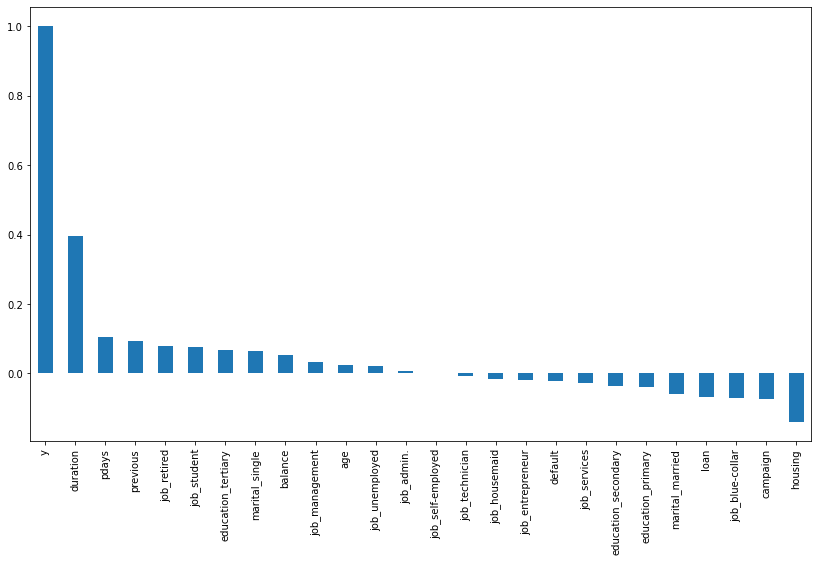

In [0]:
#Correlation plot
plt.figure(figsize=(14,8))
df3.corr()['y'].sort_values(ascending = False).plot(kind='bar')

In [0]:
#Creating binary classification target variable
df_target=df3[['y']].values
df_features=df3.drop(columns=['y'],axis=1).values
df_target1=df3[['y']]
df_features1=df3.drop(columns=['y'],axis=1)

##Feature Selection

In [0]:
##Feature Selection
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  
feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),  
           k_features=12,
           forward=True,
           verbose=2,
           scoring='roc_auc',
           cv=2)
features = feature_selector.fit(df_features1,df_target1)
filtered_features= df_features1.columns[list(features.k_feature_idx_)] 
filtered_features

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_tr

Index(['age', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'job_admin.', 'job_self-employed', 'job_technician', 'marital_single',
       'education_primary', 'education_tertiary'],
      dtype='object')

##PCA

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
pca_X=pca.fit_transform(df_features)
pca.get_covariance()

array([[ 1.12758107e+02, -2.52601487e-02,  3.16147670e+03,
        -9.78809172e-01, -6.09800220e-02, -1.27117159e+01,
         1.56600674e-01, -2.52605500e+01,  3.15118913e-02,
        -1.88302212e-01, -1.92041535e-01,  4.12708563e-02,
         1.50278685e-01, -1.01806596e-01,  1.03612962e+00,
        -1.57769504e-02, -2.01769901e-01, -2.98632276e-01,
        -2.72492568e-01,  7.32539056e-04,  1.48794460e+00,
        -2.04616520e+00,  7.46981283e-01, -4.98804455e-01,
        -3.94990756e-01],
       [-2.52601487e-02,  1.77020202e-02, -2.70386137e+01,
        -3.98321555e-04,  3.76941844e-03, -3.43373369e-01,
         6.93363998e-03, -3.99385751e-01, -5.61741979e-03,
        -4.25027174e-04,  5.65478006e-04,  6.23633399e-04,
        -7.80728154e-06, -1.43672963e-04, -3.27630872e-04,
         1.00332227e-04,  2.60030714e-06, -3.07651805e-04,
        -1.53682311e-04,  1.44024726e-04, -9.41728017e-04,
         1.86683462e-04,  7.74133207e-05,  8.79167025e-04,
        -9.23946613e-04],
    

In [0]:
explained_variance=pca.explained_variance_ratio_
explained_variance.shape

(25,)

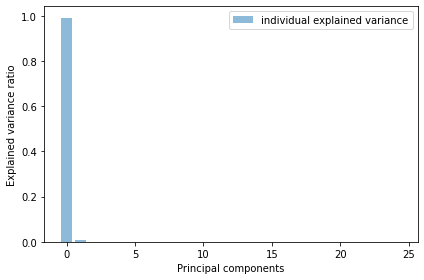

In [0]:
plt.figure(figsize=(6, 4))
plt.bar(range(25), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [0]:
pca = PCA(n_components=2)
pca_X=pca.fit_transform(df_features)
pca.get_covariance()

array([[ 4.42578445e+02, -9.13904799e-03,  3.16136114e+03,
        -3.57090874e-02, -3.18491744e-02, -1.26008039e+01,
        -2.82735898e-02,  3.71318590e-01,  3.97646920e-02,
        -8.48763524e-03, -2.11199576e-02,  1.80506763e-03,
         3.75819282e-04,  2.89156643e-02,  1.02316341e-02,
         3.31097604e-03, -1.14885800e-02,  2.48895200e-04,
        -6.04733270e-03,  1.32704003e-03,  1.38776646e-02,
        -6.52510570e-03, -5.66754101e-03, -3.64229927e-02,
         3.97735650e-02],
       [-9.13904799e-03,  4.41495297e+02, -2.70373808e+01,
         2.99746982e-04,  2.79160735e-04, -3.41121171e-01,
         6.96929540e-04, -2.83880132e-03, -3.42942723e-04,
         8.10002359e-05,  1.72970730e-04, -1.49614245e-05,
        -9.14745293e-07, -2.40361152e-04, -9.70211036e-05,
        -3.05583467e-05,  9.71225783e-05, -5.04334767e-07,
         5.74722557e-05, -1.72228100e-05, -9.88555673e-05,
         3.96283999e-05,  5.05497819e-05,  3.08379607e-04,
        -3.39432838e-04],
    

In [0]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.99182161, 0.00709202])

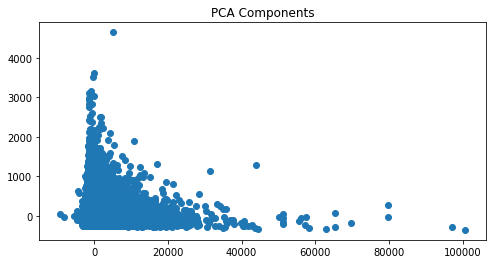

In [0]:
plt.figure(figsize=(8,4))
plt.title('PCA Components')
plt.scatter(pca_X[:,0], pca_X[:,1])

##ICA

In [0]:
from sklearn.decomposition import FastICA 
ica = FastICA(n_components=3, random_state=2) 
ica_X=ica.fit_transform(df_features)
ica_X.shape

(45211, 3)

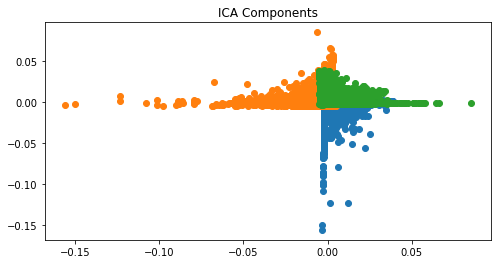

In [0]:
plt.figure(figsize=(8,4))
plt.title('ICA Components')
plt.scatter(ica_X[:,0], ica_X[:,1])
plt.scatter(ica_X[:,1], ica_X[:,2])
plt.scatter(ica_X[:,2], ica_X[:,0])

##RCA

In [0]:
from sklearn.random_projection import GaussianRandomProjection
rca = GaussianRandomProjection(n_components=3, eps=0.1, random_state=2)
rca_X=rca.fit_transform(df_features)
rca_X.shape

(45211, 3)

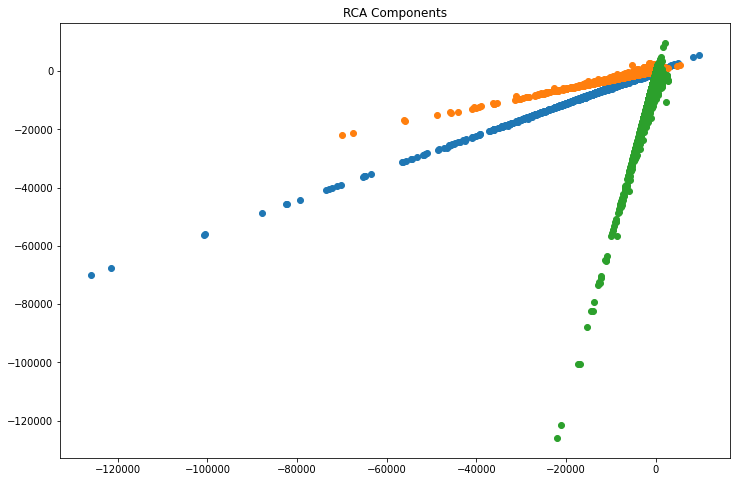

In [0]:
plt.figure(figsize=(12,8))
plt.title('RCA Components')
plt.scatter(rca_X[:,0], rca_X[:,1])
plt.scatter(rca_X[:,1], rca_X[:,2])
plt.scatter(rca_X[:,2], rca_X[:,0])

#K-Means

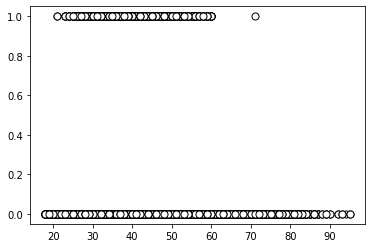

In [0]:
# plot data
plt.scatter(
   df_features[:, 0], df_features[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.show()

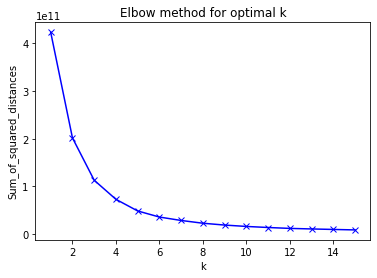

In [0]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
    km=km.fit(df_features)
    Sum_of_squared_distances.append(km.inertia_)
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

[0 0 0 ... 0 0 0]


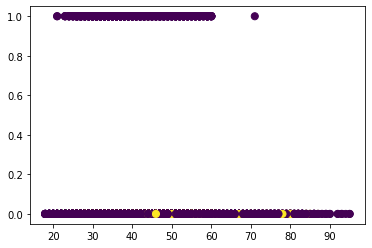

In [0]:
# Fitting K-Means to the dataset
from scipy import stats

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(df_features)
print(prediction)

plt.scatter(df_features[:, 0], df_features[:, 1], c=prediction, s=50)
centers = kmeans.cluster_centers_

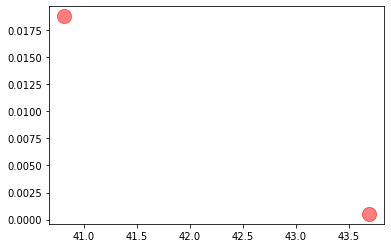

In [0]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

##With Feature Selection

In [0]:
df_fs=df_features1[['age', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'job_admin.', 'job_self-employed', 'job_technician', 'marital_single',
       'education_primary', 'education_tertiary']].values
df_fs

array([[  58, 2143,    1, ...,    0,    0,    1],
       [  44,   29,    1, ...,    1,    0,    0],
       [  33,    2,    1, ...,    0,    0,    0],
       ...,
       [  72, 5715,    0, ...,    0,    0,    0],
       [  57,  668,    0, ...,    0,    0,    0],
       [  37, 2971,    0, ...,    0,    0,    0]])

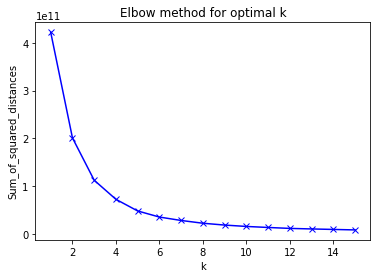

In [0]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
    km=km.fit(df_fs)
    Sum_of_squared_distances.append(km.inertia_)
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

[0 0 0 ... 0 0 0]


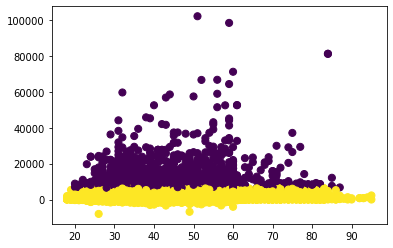

In [0]:
# Fitting K-Means to the dataset
from scipy import stats

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(df_fs)
print(prediction)

plt.scatter(df_fs[:, 0], df_fs[:, 1], c=prediction, s=50, cmap='viridis_r')

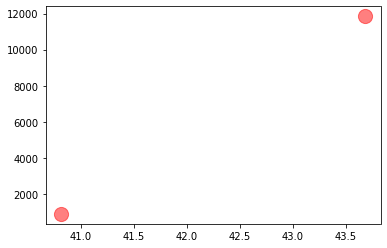

In [0]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

##With PCA

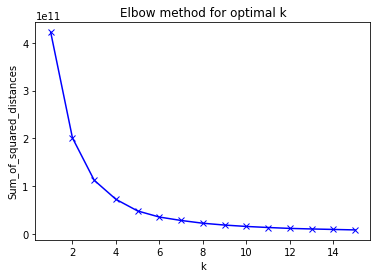

In [0]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
    km=km.fit(pca_X)
    Sum_of_squared_distances.append(km.inertia_)
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

[0 0 0 ... 0 0 0]


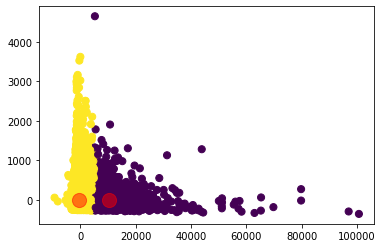

In [0]:
# Fitting K-Means to the dataset
from scipy import stats

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(pca_X)
print(prediction)

plt.scatter(pca_X[:, 0], pca_X[:, 1], c=prediction, s=50, cmap='viridis_r')
centers = kmeans.cluster_centers_
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

##With ICA

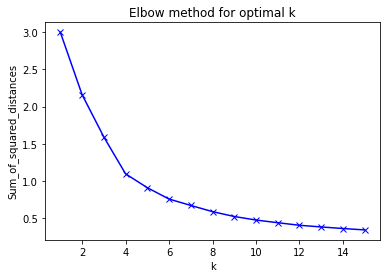

In [0]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
    km=km.fit(ica_X)
    Sum_of_squared_distances.append(km.inertia_)
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

[0 0 0 ... 1 0 1]


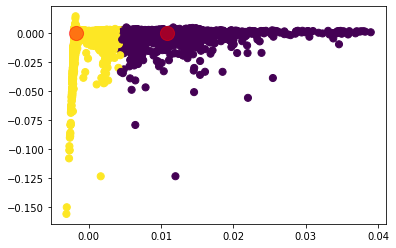

In [0]:
# Fitting K-Means to the dataset
from scipy import stats

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(ica_X)
print(prediction)

plt.scatter(ica_X[:, 0], ica_X[:, 1], c=prediction, s=50, cmap='viridis_r')
centers = kmeans.cluster_centers_
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

##With RCA

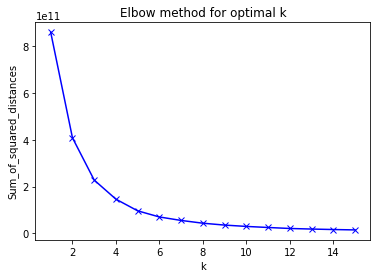

In [0]:
##Determining number of clusters
from sklearn.cluster import KMeans 
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
    km=km.fit(rca_X)
    Sum_of_squared_distances.append(km.inertia_)
##Checking out which SSE is low for different types of k means value
plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow method for optimal k')
plt.show()

[0 0 0 ... 0 0 0]


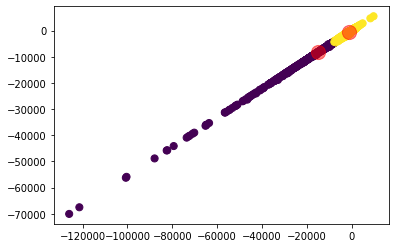

In [0]:
# Fitting K-Means to the dataset
from scipy import stats

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(rca_X)
print(prediction)

plt.scatter(rca_X[:, 0], rca_X[:, 1], c=prediction, s=50, cmap='viridis_r')
centers = kmeans.cluster_centers_
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

#Expectation Maximization

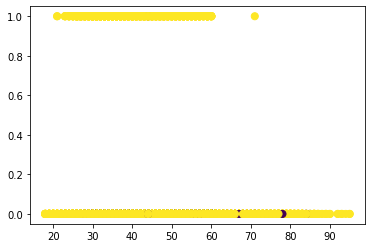

In [0]:
## Expectation maximization analysis
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(df_features)
em_probs = em.predict_proba(df_features)
#em.means_
#em.covariances_
plt.scatter(df_features[:, 0], df_features[:, 1], c=em_pred, s=50, cmap='viridis_r')

##With Feature Selection

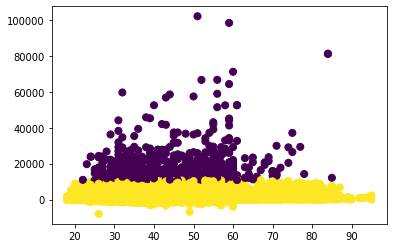

In [0]:
## Expectation maximization analysis
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(df_fs)
em_probs = em.predict_proba(df_fs)
#em.means_
#em.covariances_
plt.scatter(df_fs[:, 0], df_fs[:, 1], c=em_pred, s=50, cmap='viridis_r')

##With PCA

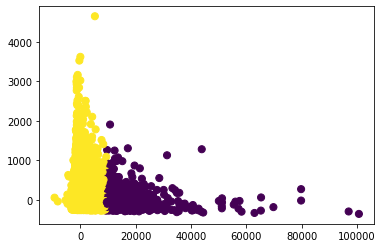

In [0]:
## Expectation maximization analysis
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(pca_X)
em_probs = em.predict_proba(pca_X)
#em.means_
#em.covariances_
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=em_pred, s=50, cmap='viridis_r')

##With ICA

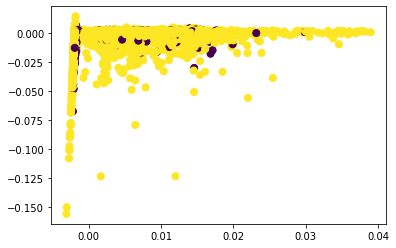

In [0]:
## Expectation maximization analysis
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(ica_X)
em_probs = em.predict_proba(ica_X)
#em.means_
#em.covariances_
plt.scatter(ica_X[:, 0], ica_X[:, 1], c=em_pred, s=50, cmap='viridis_r')

##With RCA

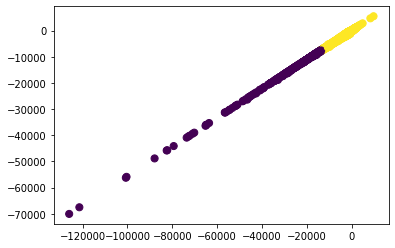

In [0]:
## Expectation maximization analysis
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(rca_X)
em_probs = em.predict_proba(rca_X)
#em.means_
#em.covariances_
plt.scatter(rca_X[:, 0], rca_X[:, 1], c=em_pred, s=50, cmap='viridis_r')

#ANN after PCA

In [0]:
x1_train, x1_test, y1_train, y1_test = train_test_split(pca_X, df_target, test_size = 0.3, random_state = 0)

In [0]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="softmax"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="softmax"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x1_train, y1_train, batch_size = 10, epochs=100,validation_split=0.3)

Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 4s 171us/step - loss: 0.4009 - accuracy: 0.8840 - val_loss: 0.3545 - val_accuracy: 0.8815
Epoch 2/100
22152/22152 [==============================] - 3s 153us/step - loss: 0.3334 - accuracy: 0.8840 - val_loss: 0.3192 - val_accuracy: 0.8815
Epoch 3/100
22152/22152 [==============================] - 3s 152us/step - loss: 0.3172 - accuracy: 0.8840 - val_loss: 0.3134 - val_accuracy: 0.8815
Epoch 4/100
22152/22152 [==============================] - 3s 156us/step - loss: 0.3148 - accuracy: 0.8840 - val_loss: 0.3153 - val_accuracy: 0.8815
Epoch 5/100
22152/22152 [==============================] - 4s 168us/step - loss: 0.3140 - accuracy: 0.8840 - val_loss: 0.3176 - val_accuracy: 0.8815
Epoch 6/100
22152/22152 [==============================] - 4s 158us/step - loss: 0.3167 - accuracy: 0.8840 - val_loss: 0.3115 - val_accuracy: 0.8815
Epoch 7/100
22152/22152 [==============================] 

In [0]:
# Making the Confusion Matrix
def confusionmat(y,y_hat):
  from sklearn.metrics import confusion_matrix,accuracy_score
  cm = confusion_matrix(y, y_hat)
  accu=accuracy_score(y,y_hat)
  print(cm,"\n")
  print("The accuracy is",accu)

#Accuracy and Loss Curves
def learningcurve(history):
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
13564/13564 [==============================] - 0s 20us/step
For epoch = 100, the model test accuracy is 0.8824093341827393.
The model test average precision score is 0.11759068121498083.
[[11969     0]
 [ 1595     0]] 

The accuracy is 0.8824093187850192
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


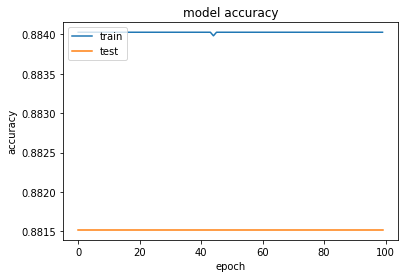

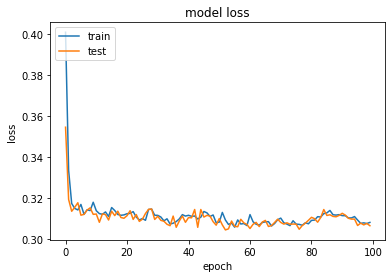

In [0]:
# Predicting the Test set results
y_pred = classifier.predict_classes(x1_test)
pre_score = sk.average_precision_score(y1_test, y_pred)
classifier.summary()
test_results = classifier.evaluate(x1_test, y1_test)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(y1_test,y_pred)
learningcurve(history)

#Task 5

In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(x1_train)

em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(x1_train)
em_probs = em.predict_proba(x1_train)

train_df = pd.DataFrame()
train_df['KM_Pred']=prediction
train_df['EM_Prob']=em_probs[:,1]
train_df['y']=y1_train
train_df

,KM_Pred,EM_Prob,y
0,0,2.775327e-15,0
1,0,1.647200e-16,0
2,0,1.390953e-16,0
3,0,6.128975e-14,0
4,0,5.850140e-16,0
...,...,...,...
31642,0,2.922735e-15,0
31643,0,1.060475e-15,0
31644,0,2.361378e-16,1
31645,0,7.166501e-16,0


In [0]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, n_init=10, max_iter=300, init = 'k-means++', random_state = 2)
prediction = kmeans.fit_predict(x1_test)

em = GaussianMixture(n_components=2,random_state=2,covariance_type='tied')
em_pred = em.fit_predict(x1_test)
em_probs = em.predict_proba(x1_test)

test_df = pd.DataFrame()
test_df['KM_Pred']=prediction
test_df['EM_Prob']=em_probs[:,1]
test_df['y']=y1_test
test_df

,KM_Pred,EM_Prob,y
0,1,1.000000,0
1,1,1.000000,1
2,1,1.000000,0
3,1,1.000000,0
4,1,1.000000,0
...,...,...,...
13559,1,1.000000,0
13560,1,1.000000,0
13561,1,1.000000,0
13562,0,0.000002,0


In [0]:
#Creating binary classification target variable
train_y=train_df[['y']].values
train_x=train_df.drop(columns=['y'],axis=1).values
test_y=test_df[['y']]
test_x=test_df.drop(columns=['y'],axis=1)

In [0]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(32,activation="softmax"))

# Adding the second hidden layer
classifier.add(Dense(16,activation="softmax"))

# Adding the output layer
classifier.add(Dense(1,activation="sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(train_x, train_y, batch_size = 10, epochs=100,validation_split=0.3)

Train on 22152 samples, validate on 9495 samples
Epoch 1/100
22152/22152 [==============================] - 3s 156us/step - loss: 0.4157 - accuracy: 0.8687 - val_loss: 0.3639 - val_accuracy: 0.8815
Epoch 2/100
22152/22152 [==============================] - 3s 152us/step - loss: 0.3589 - accuracy: 0.8840 - val_loss: 0.3639 - val_accuracy: 0.8815
Epoch 3/100
22152/22152 [==============================] - 3s 151us/step - loss: 0.3589 - accuracy: 0.8840 - val_loss: 0.3639 - val_accuracy: 0.8815
Epoch 4/100
22152/22152 [==============================] - 3s 149us/step - loss: 0.3589 - accuracy: 0.8840 - val_loss: 0.3638 - val_accuracy: 0.8815
Epoch 5/100
22152/22152 [==============================] - 3s 152us/step - loss: 0.3588 - accuracy: 0.8840 - val_loss: 0.3640 - val_accuracy: 0.8815
Epoch 6/100
22152/22152 [==============================] - 3s 153us/step - loss: 0.3588 - accuracy: 0.8840 - val_loss: 0.3637 - val_accuracy: 0.8815
Epoch 7/100
22152/22152 [==============================] 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
13564/13564 [==============================] - 0s 17us/step
For epoch = 100, the model test accuracy is 0.8824093341827393.
The model test average precision score is 0.11759068121498083.
[[11969     0]
 [ 1595     0]] 

The accuracy is 0.8824093187850192
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


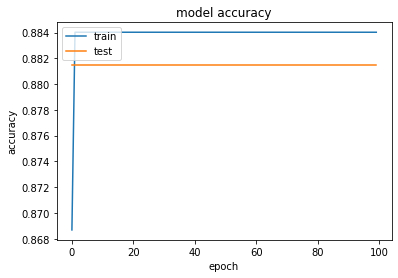

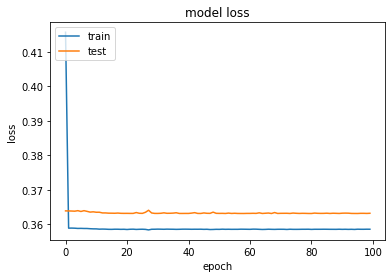

In [0]:
# Predicting the Test set results
y_pred = classifier.predict_classes(test_x)
pre_score = sk.average_precision_score(test_y, y_pred)
classifier.summary()
test_results = classifier.evaluate(test_x, test_y)
print("For epoch = {0}, the model test accuracy is {1}.".format(100,test_results[1]))
print("The model test average precision score is {}.".format(pre_score))
confusionmat(test_y,y_pred)
learningcurve(history)